#Análisis profundo de datos: GooglePlayStore dataset:

##Introduccion

Este proyecto tiene como objetivo identificar las categorias mas consumidas en la Google Play Store y segmentar sus publicos por edades. El proyecto posee como proposito conocer mas sobre el nicho de cada categoria desarrollando propuestas de marketing a partir de los datos retornados.



In [1]:
# Importar librerias (en caso de ser necesario)
!pip install opendatasets
!pip install pandas
!pip install numpy
!pip install matplotlib


In [2]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od
import os

In [ ]:
# Obtención de Dataset de Kaggle, a partir de la descarga de este paquete mediante la libreria "opendatasets"
dataset_link = "https://www.kaggle.com/datasets/bhavikjikadara/google-play-store-applications?resource=download"
od.download(dataset_link)
os.chdir("google-play-store-applications")
os.listdir()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: josdilone
Your Kaggle Key: ··········


100%|██████████| 328k/328k [00:00<00:00, 74.5MB/s]

['googleplaystore.csv']

In [ ]:
# Visualización previa del CSV
dataset_name = 'googleplaystore.csv'
dataset = pd.read_csv(dataset_name)
dataset

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [ ]:
# Confirmamos si estos valores están en todo el dataset
dataset = dataset.drop(['Current Ver', 'Android Ver'], axis=1)
dataset

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17
10837,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18
10838,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17
10839,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15


In [ ]:
# Se elimina una fila, a través de su índice, con datos no utilizables.
dataset = dataset.drop(10472)

In [ ]:
# Obtener las categorias existentes del dataset
categorias = []
for x in dataset['Category']:
  if x in categorias:
    pass
  else:
    categorias.append(x)
    print(x)

ART_AND_DESIGN
AUTO_AND_VEHICLES
BEAUTY
BOOKS_AND_REFERENCE
BUSINESS
COMICS
COMMUNICATION
DATING
EDUCATION
ENTERTAINMENT
EVENTS
FINANCE
FOOD_AND_DRINK
HEALTH_AND_FITNESS
HOUSE_AND_HOME
LIBRARIES_AND_DEMO
LIFESTYLE
GAME
FAMILY
MEDICAL
SOCIAL
SHOPPING
PHOTOGRAPHY
SPORTS
TRAVEL_AND_LOCAL
TOOLS
PERSONALIZATION
PRODUCTIVITY
PARENTING
WEATHER
VIDEO_PLAYERS
NEWS_AND_MAGAZINES
MAPS_AND_NAVIGATION


In [ ]:
# Identificar la categoría con mayor cantidad de reviews
reviews_por_categoria = {}
for x in categorias:
    total = 0
    for Index, row in dataset.iterrows():  # Iterar sobre cada fila del DataFrame
        if x == row['Category']:
            total += int(row['Reviews'])  # Sumar las revisiones para esta categoría
    reviews_por_categoria[x] = total

# Imprimir el diccionario con los totales de revisiones por categoría

tabla_reviews_categoria = pd.DataFrame.from_dict(reviews_por_categoria, orient='index',columns=['reviews'])
print(tabla_reviews_categoria)

                        reviews
ART_AND_DESIGN          1714440
AUTO_AND_VEHICLES       1163666
BEAUTY                   396240
BOOKS_AND_REFERENCE    21959069
BUSINESS               13954552
COMICS                  3383276
COMMUNICATION         815462260
DATING                  7291278
EDUCATION              39595786
ENTERTAINMENT          59178154
EVENTS                   161018
FINANCE                17550728
FOOD_AND_DRINK          8883330
HEALTH_AND_FITNESS     37893743
HOUSE_AND_HOME          3976385
LIBRARIES_AND_DEMO      1037118
LIFESTYLE              12882784
GAME                 1585422349
FAMILY                410226330
MEDICAL                 1585975
SOCIAL                621241422
SHOPPING              115041222
PHOTOGRAPHY           213516650
SPORTS                 70830169
TRAVEL_AND_LOCAL       62617919
TOOLS                 273185044
PERSONALIZATION        89346140
PRODUCTIVITY          114116975
PARENTING                958331
WEATHER                14604735
VIDEO_PL

In [ ]:
#Identificar las 5 categorías con mas reviews en un diccionario aparte.
top5_tabla_reviews_categoria = tabla_reviews_categoria['reviews'].nlargest(5)
print(top5_tabla_reviews_categoria)

#Enlistar el top 5 de categorías con mas reviews.
diccionario = top5_tabla_reviews_categoria.to_dict()
top5_categorias = list(diccionario.keys())


GAME             1585422349
COMMUNICATION     815462260
SOCIAL            621241422
FAMILY            410226330
TOOLS             273185044
Name: reviews, dtype: int64


In [ ]:
#Obtener el top 5 de las aplicaciones mejor valoradas.
def obtener_top_apps_por_categoria(dataset, categorias, top_n=5):
    top_apps_por_categoria = {}

    for categoria in categorias: # Se hace un bucle sobre los valores de las categorías
        dic = {}
        for _, row in dataset.iterrows(): # Sobre cada columna del dataset
            if categoria == row['Category']: # Si la categoria es igual a la del dataset y si el valor del rating no esta vacío, hacemos un append
                if row['Rating'] is not np.nan:
                    dic[row['App']] = row['Rating']

        diccionario_ordenado = sorted(dic.items(), key=lambda x: x[1], reverse=True) # Ordenamos el diccionario
        top_valores = dict(diccionario_ordenado[:top_n]) # Obtenemos las 5 primeras aplicaciones de las 5 primeras categorías
        top_apps_por_categoria[categoria] = list(top_valores.keys())

    return top_apps_por_categoria # Devolvemos un diccionario con estos valores

# Llamar a la función para obtener las top apps para cada categoría
top_apps_por_categoria = obtener_top_apps_por_categoria(dataset, top5_categorias)

# Imprimir las listas de las top apps para cada categoría
for categoria, top_apps in top_apps_por_categoria.items():
    print(f"Top apps para la categoría {categoria}: {top_apps}")

Top apps para la categoría GAME: ['The Room: Old Sins', 'Wordscapes', 'Cash, Inc. Money Clicker Game & Business Adventure', 'Solitaire', 'Bubble Witch 3 Saga']
Top apps para la categoría COMMUNICATION: ['Should I Answer?', 'Google Duo - High Quality Video Calls', 'CM Browser - Ad Blocker , Fast Download , Privacy', 'Email TypeApp - Mail App', 'Mail.Ru - Email App']
Top apps para la categoría SOCIAL: ['Amino: Communities and Chats', 'Pinterest', 'Telegram X', 'Who Viewed My Facebook Profile - Stalkers Visitors', 'Hide Something - Photo, Video']
Top apps para la categoría FAMILY: ['Hungry Hearts Diner: A Tale of Star-Crossed Souls', 'PixPanda - Color by Number Pixel Art Coloring Book', 'No. Color - Color by Number, Number Coloring', 'Fuzzy Seasons: Animal Forest', 'Pino chess']
Top apps para la categoría TOOLS: ['ADS-B Driver', 'Easy Hotspot Ad Free', 'Calculator with Percent (Free)', 'ZArchiver Donate', 'Brightest Flashlight Free ®']


In [ ]:
# Se filtran los dataset por sus categorías, obteniendo los valores distribuidos por categoria
def dataframe_filtrado_por_tops(dataset, lista_claves_tops, categorias):
  datos_filtrados = []
  for categoria in categorias:
      datos_filtrados.append(dataset[dataset['App'].isin(lista_claves_tops[categoria])])
  return datos_filtrados

dataframe_filtrado = dataframe_filtrado_por_tops(dataset, top_apps_por_categoria, top_apps_por_categoria.keys())

print(dataframe_filtrado)

[      Unnamed: 0                                                App Category  \
1656        1656                                          Solitaire     GAME   
1677        1677                                Bubble Witch 3 Saga     GAME   
1714        1714                                         Wordscapes     GAME   
1765        1765                                         Wordscapes     GAME   
1797        1797                                         Wordscapes     GAME   
1820        1820  Cash, Inc. Money Clicker Game & Business Adven...     GAME   
1833        1833                                 The Room: Old Sins     GAME   
1889        1889                                         Wordscapes     GAME   
1973        1973                                          Solitaire     GAME   
2024        2024                                          Solitaire   FAMILY   

      Rating  Reviews Size     Installs  Type   Price Content Rating  \
1656     4.7   254258  23M  10,000,000+  Free 

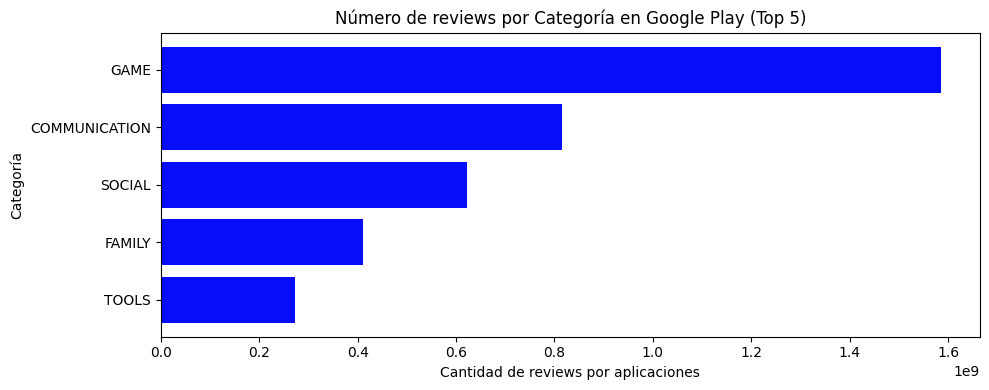

In [ ]:
# Datos del gráfico (número de aplicaciones por categoría)
categorias_principales = top5_tabla_reviews_categoria.index
num_aplicaciones = top5_tabla_reviews_categoria.values

# Crear el gráfico de barras
plt.figure(figsize=(10, 4))
plt.barh(categorias_principales, num_aplicaciones, color='#050dfa')
plt.xlabel('Cantidad de reviews por aplicaciones')
plt.ylabel('Categoría')
plt.title('Número de reviews por Categoría en Google Play (Top 5)')
plt.gca().invert_yaxis()  # Invertir el eje y para que la categoría superior esté en la parte superior
plt.tight_layout() # Ajustar la forma en la que se presenta

# Mostrar el gráfico
plt.show()


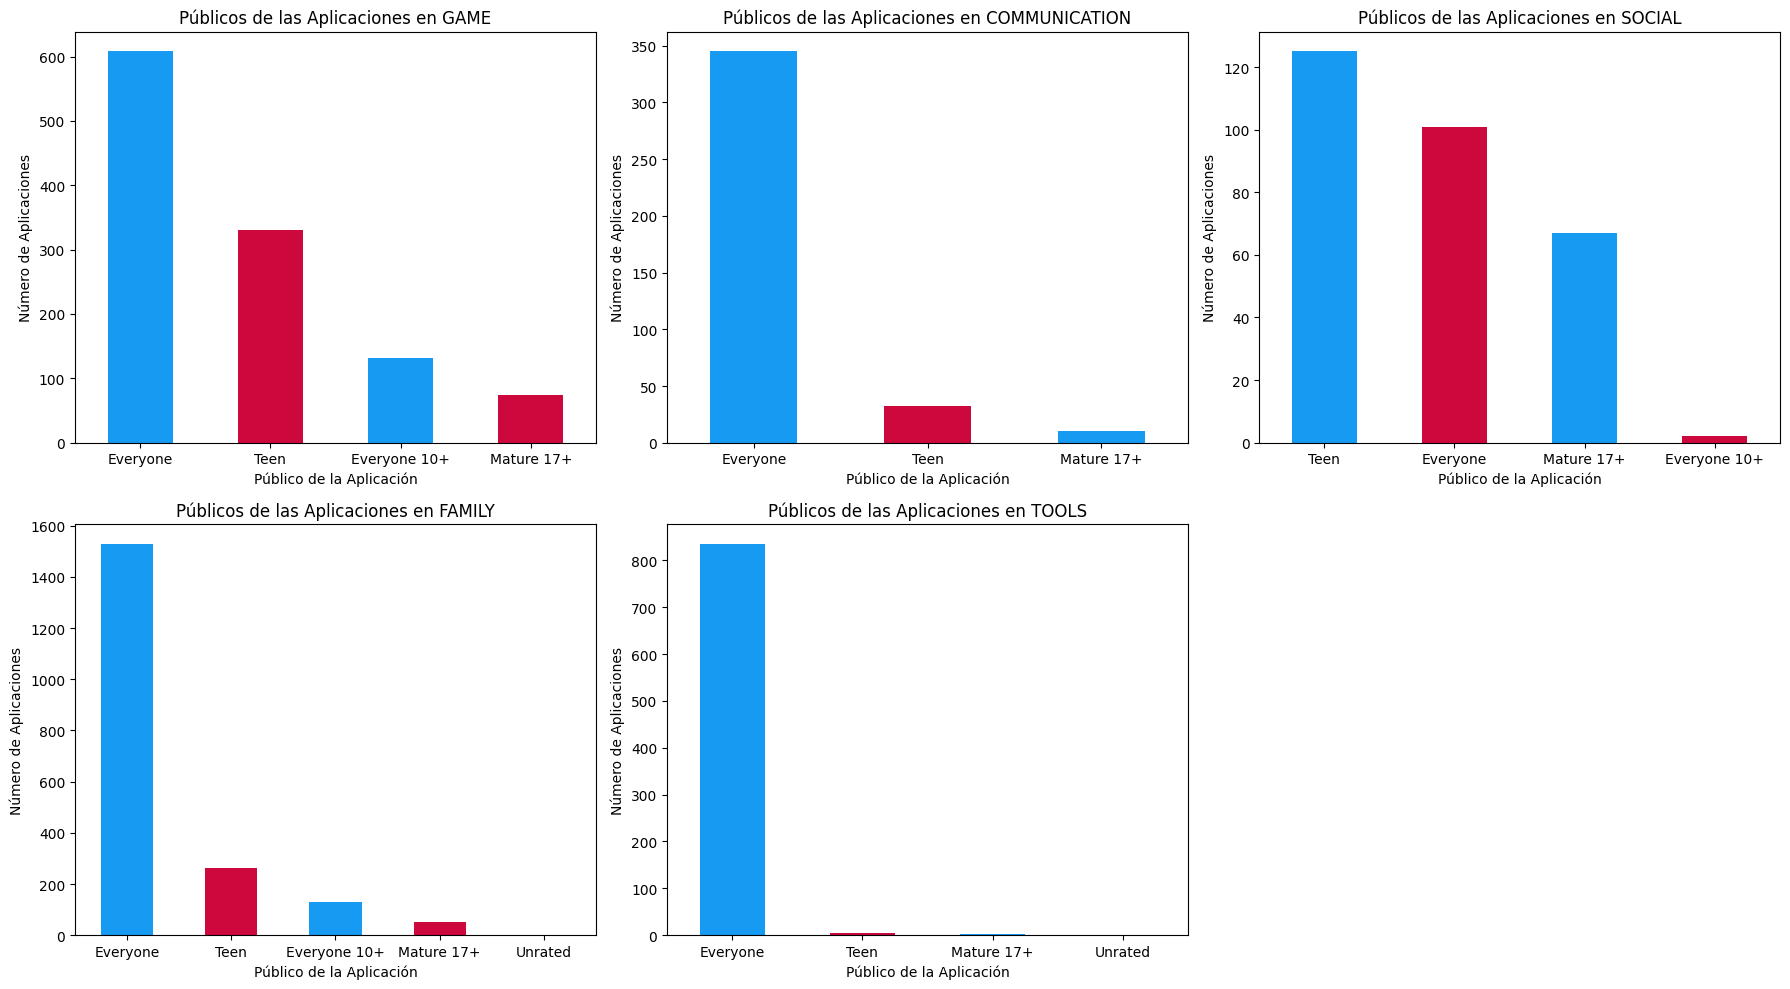

In [ ]:
# Datos del gráfico (Cantidad de aplicaciones por público objetivo en cada categoría)
plt.figure(figsize=(18, 10))

# Iterar sobre las categorías principales y crear subgráficos
for i, categoria in enumerate(categorias_principales, 1):
    # Se obtienen los tipos de aplicaciones y sus conteos para la categoría actual en base al "Content Rating"
    tipos_aplicaciones = dataset[dataset['Category'] == categoria]['Content Rating'].value_counts()

    # Crear un subgráfico para cada categoría
    plt.subplot(2, 3, i)

    # Crear el diagrama para la categoría actual
    tipos_aplicaciones.plot(kind='bar', color=['#169af2', '#cc083c'])

    # Configurar las etiquetas y el título de cada gráfico
    plt.xlabel('Público de la Aplicación')
    plt.ylabel('Número de Aplicaciones')
    plt.title(f'Públicos de las Aplicaciones en {categoria}')
    plt.xticks(rotation=0)
    plt.tight_layout()

plt.show()


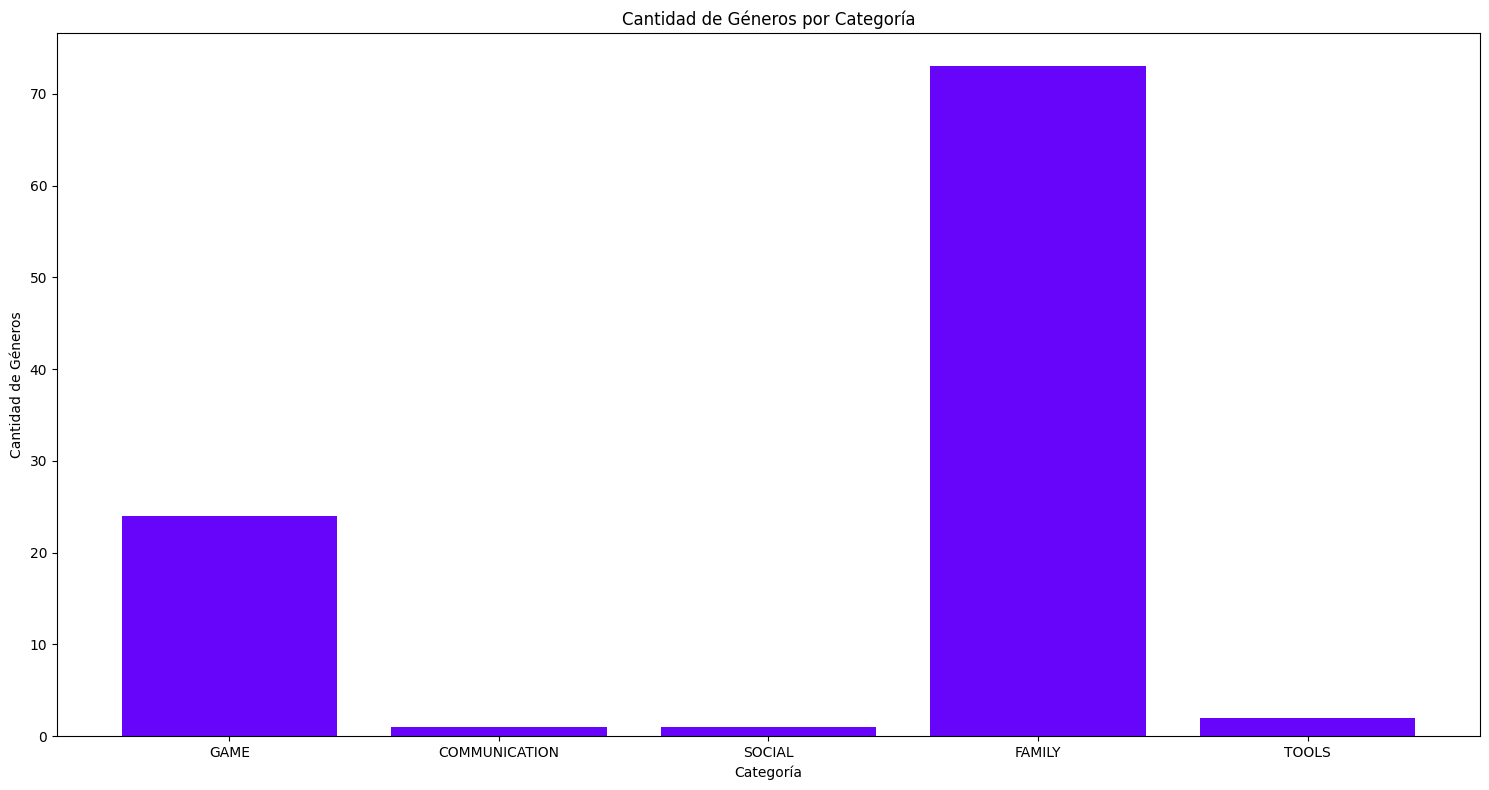

In [ ]:
# Datos del gráfico (Cantidad de generos en cada categoría)
plt.figure(figsize=(15, 8))

# Iterar sobre las categorías principales y crear subgráficos
for i, categoria in enumerate(categorias_principales, 1):

    # Se obtienen los géneros para la categoría actual
    generos = dataset[dataset['Category'] == categoria]['Genres'].nunique()

    # Crear el diagrama de barras para la categoría actual
    plt.bar(categoria, generos, color='#6705fa')

    # Configurar las etiquetas y el título del subgráfico
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad de Géneros')
    plt.title(f'Cantidad de Géneros por Categoría')
    plt.tight_layout()

plt.show()


## Conclusiones y recomendaciones

### **Conclusión**

El objetivo de el analisis de datos sobre las aplicaciones de google play fue identificar informaciones priorizantes en el conjunto de aplicaciones mas populares de las categorias mas consumidas, realizando un estudio de nichos de mercado mas activos en la google play con el fin de proporcionar a desarrolladores novatos de aplicaciones moviles (Android) algunos detalles a tener en cuenta a la hora de iniciar en este mundo en la actualidad.

En lo largo del estudio del nicho de mercado, se descubrio que las aplicaciones con mas actividad pertenecen a categorias relacionadas con el entretenimiento y el ocio, siendo la primera mencionada la mas predominante con una notable diferencia, lo que indica que estas son las categorias mas competitivas para los desarrolladores moviles. Aqui le dejamos un listado sobre el top 5 categorias mas interactivas del google play.

- GAME 1585422349
- COMMUNICATION     815462260
- SOCIAL            621241422
- FAMILY            410226330
- TOOLS             273185044

Dentro de cada una de estas categorias hay un mundo dentro, enfocandonos en el nicho de mercado en cada categoria pudimos observar que las 4 de 5 categorias mencionadas tienen el mismo publico, para todas las edades. La excepción la podemos observar en social, donde en esta se dirige mayormente para adolescentes.

Por ultimo, analizamos la segmentación de generos dentro de las 5 categorias y, sorprendentemente, las categorias de comunicación, social y herramientas poseen una cantidad de generos casi nula, quedandose asi como una categoria con un solo enfoque y/o tarea en especifica. En el caso de videojuegos y familia, podemos notar que no es asi, existen muchos generos que dividen cada categoria, teniendo asi, muchas opciones a cuales aspirar a la hora de trabajar con estas categorias.


### **Recomendaciones**

La recomendación que se puede hacer al desarrollador que desea embarcarse al desarrollo de aplicaciones moviles es que sea consciente de que la segunda aplicación con más subgéneros distintos, es la más competitiva, ya que hay más aplicaciones de este tipo (aplicaciones de juego). Mientras que, de las que menos tienen dentro del top 5 con más aplicaciones, es la que tiene más público general y subgéneros, siendo así una de las categorías dentro del top más recomendadas para hacer una aplicación. Además, en caso de considerar hacer alguna aplicación de categoría Social, se recomienda orientar el desarrollo de esta hacia un público juvenil, dado que es el mayor porcentaje de usuarios que consumen este tipo de aplicaciones.

Como recomendacion de un proximo analisis de data, se deberia identificar las caracteristicas generales de las 5 aplicaciones mas exitosas por caracteristicas, como por ejemplo, si su mayoria son de paga o, en diferencia, son gratuitas y su metodo de remuneracion son las compras internas, su peso y la frecuencia de sus actualizaciones tomando de referencia su ultima actualizacion con el fin de reconocer que caracteristicas debe tener una aplicacion posiblemente ideal y, que comportamiento deberia seguir con las actualizaciones del app.



